In [7]:
import gensim
import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from os import listdir
from os.path import isfile, join
#nltk.download()
import string 
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import pickle 
import pandas as pd 
import os
import pickle
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt

In [8]:
#case metadata
casedata = pd.read_pickle('casedata.pkl')


print(len(casedata))


print(len(casedata))
categ=casedata['Sub-Category'].unique()
print((categ))

10381
10381
['Contracts' 'Damages & Remedies' 'Bankruptcy Law' 'Consumer Law'
 'Tax & Accounting' 'Agency' 'Insurance Law' 'Government Contracts'
 'Patent Law' 'Antitrust & Trade' 'Employee Benefits' 'Copyright Law'
 'Employment Law' 'Wills, Trusts & Estates' 'Agricultural Law'
 'Securities Law' "Workers' Compensation" 'Construction Law'
 'Banking & Finance' 'Admiralty & Maritime' 'Motor Vehicles & Traffic Law'
 'Labor Law' 'Torts' 'Trademark Law' 'International Trade Law'
 'Eminent Domain' 'Products Liability' 'Franchise Law'
 'Partnerships & Non-Corporate Business Entities' 'Technology Law'
 'Energy Law' 'Trade Secrets' 'Corporate Law' 'Real Property'
 'Land Use Planning & Zoning' 'Landlord & Tenant' 'Mortgages & Liens'
 'Personal Property' 'Intellectual Property Treaties & Conventions'
 'Social Security' '' 'Debtor Creditor' 'Medical Malpractice'
 'Mergers & Acquisitions' 'Real Estate Investment Trusts'
 'Executive Compensation']


In [9]:
d2v_model = gensim.models.doc2vec.Doc2Vec.load('doc2vec_2.model')


In [10]:
columns1=['CaseId','Date','Vector','Year','Month','Category','Sub-Category']


i=0
docvector= pd.DataFrame(columns=columns1)
for caseid,row in casedata.iterrows():
    
    date=casedata.loc[caseid]["Date"]
    m=casedata.loc[caseid]["Month"]
    
    
    try:
        
        m1=int(m)
        y=int(casedata.loc[caseid]["Year"])
        
        
        cc=casedata.loc[caseid]["Category"]
        sc=casedata.loc[caseid]["Sub-Category"]
        docvec = d2v_model.docvecs[caseid]
        docvector = docvector.append({'CaseId':caseid,'Date':date,'Vector':docvec,'Month':m1,'Year':y,'Category':cc,'Sub-Category':sc},ignore_index=True)
        

    except:
        
        
        continue
            
print(len(docvector))
print(docvector.head(10))


10317
       CaseId     Date                                             Vector  \
0  X1HND4A003  5/11/12  [-0.62676, -6.11609, -0.269485, -5.1118, -2.90...   
1  X1IRIC8003  11/5/12  [-0.678548, -2.43954, -2.53863, -3.21261, 1.29...   
2    X1EO338N  12/6/12  [2.1332, -3.84846, -3.70533, 2.29314, 1.55705,...   
3  X1HL1BM003   5/3/12  [-0.00221978, -0.197883, -2.25101, -1.14762, -...   
4  X1I4TS0003  8/23/12  [-3.00436, -2.6781, -2.10325, 0.562846, 0.6724...   
5  X1I5EI0003  8/28/12  [-2.83687, -0.409083, -1.40842, -0.16767, 0.51...   
6  X1H21JO003  1/27/12  [-1.98722, 3.3379, -0.889723, 3.76757, -1.0275...   
7  X1H8ICQ003  3/12/12  [-1.24977, -7.05364, -2.74494, -5.01883, 2.259...   
8  X1I6G64003   9/4/12  [1.22967, -4.58314, -2.40253, -7.66645, 1.2880...   
9  X1GT588003   1/3/12  [2.34826, -4.53164, -2.46613, -0.0690274, 0.48...   

   Year Month  Category        Sub-Category  
0  2012     5       7.0           Contracts  
1  2012    11       7.0  Damages & Remedies  
2  2012 

In [11]:
vec=docvector['Vector']

In [12]:
docvector.to_pickle("docvector.pkl")

In [13]:
with open('docvector.pkl', 'rb') as f:
    docvec = pickle.load(f)
print(docvec.head(3))

       CaseId     Date                                             Vector  \
0  X1HND4A003  5/11/12  [-0.62676, -6.11609, -0.269485, -5.1118, -2.90...   
1  X1IRIC8003  11/5/12  [-0.678548, -2.43954, -2.53863, -3.21261, 1.29...   
2    X1EO338N  12/6/12  [2.1332, -3.84846, -3.70533, 2.29314, 1.55705,...   

   Year Month  Category        Sub-Category  
0  2012     5       7.0           Contracts  
1  2012    11       7.0  Damages & Remedies  
2  2012    12       7.0      Bankruptcy Law  


In [14]:
train=docvec[docvec["Year"]<2009]
print(len(train))      
print(train.head(3))

7377
          CaseId      Date                                             Vector  \
1089  X16G9CO003   3/19/07  [-1.08903, -2.65365, 1.82479, -4.44473, 0.0766...   
1090  X17GUKO003   8/17/07  [-2.37343, 2.65059, -2.7418, 0.73231, 0.254526...   
1091  X182KAU003  11/27/07  [-1.10612, -6.51523, 2.09831, -3.91097, 0.6407...   

      Year Month  Category       Sub-Category  
1089  2007     3       7.0  Antitrust & Trade  
1090  2007     8       6.0          Labor Law  
1091  2007    11       7.0    Social Security  


In [15]:
test=docvec[(docvec["Year"]>=2012)]

print(len(test)) 
print(test.head(3))

1089
       CaseId     Date                                             Vector  \
0  X1HND4A003  5/11/12  [-0.62676, -6.11609, -0.269485, -5.1118, -2.90...   
1  X1IRIC8003  11/5/12  [-0.678548, -2.43954, -2.53863, -3.21261, 1.29...   
2    X1EO338N  12/6/12  [2.1332, -3.84846, -3.70533, 2.29314, 1.55705,...   

   Year Month  Category        Sub-Category  
0  2012     5       7.0           Contracts  
1  2012    11       7.0  Damages & Remedies  
2  2012    12       7.0      Bankruptcy Law  


In [16]:
validation=docvec[(docvec["Year"]>=2009) & (docvec["Year"]<2012)]
print(len(validation)) 
print(validation.head(3))

1851
          CaseId     Date                                             Vector  \
1894  X1AOTO8003  3/16/09  [-2.26356, 1.72836, -5.64097, -1.44974, 4.0692...   
1895  X1AKIFM003  2/25/09  [2.25481, -1.69733, -3.37127, -0.102212, -3.36...   
1896  X1BBQ9Q003  7/22/09  [-0.723924, 1.32398, 1.22064, -6.29781, -0.733...   

      Year Month  Category             Sub-Category  
1894  2009     3       7.0  International Trade Law  
1895  2009     2       7.0           Bankruptcy Law  
1896  2009     7       7.0            Corporate Law  


In [17]:
train.to_pickle("traindocvector.pkl")
test.to_pickle("testdocvector.pkl")
validation.to_pickle("validationdocvector.pkl")

In [18]:
traint = pd.read_pickle('traindocvector.pkl')
traint.head(10)

,CaseId,Date,Vector,Year,Month,Category,Sub-Category
1089,X16G9CO003,3/19/07,"[-1.08903, -2.65365, 1.82479, -4.44473, 0.0766...",2007,3,7.0,Antitrust & Trade
1090,X17GUKO003,8/17/07,"[-2.37343, 2.65059, -2.7418, 0.73231, 0.254526...",2007,8,6.0,Labor Law
1091,X182KAU003,11/27/07,"[-1.10612, -6.51523, 2.09831, -3.91097, 0.6407...",2007,11,7.0,Social Security
1092,X166MJ6003,1/19/07,"[-3.04191, -0.100824, 1.30873, 2.10517, 1.7285...",2007,1,6.0,Employee Benefits
1093,X16CGCI003,2/27/07,"[-1.37799, -4.01341, -2.92419, -2.43613, -0.90...",2007,2,7.0,Bankruptcy Law
1094,X17S13K003,10/25/07,"[2.38157, 0.60741, -1.16368, -2.57861, -2.5075...",2007,10,7.0,Banking & Finance
1095,X17ATPU003,7/20/07,"[-4.97388, -4.36111, -6.60766, -1.85749, -0.00...",2007,7,7.0,Torts
1096,X1654QQ003,1/2/07,"[-1.78357, -2.14369, -1.10106, 2.05554, 0.9522...",2007,1,7.0,Bankruptcy Law
1097,X17F7V6003,8/9/07,"[-2.90228, -5.08191, -0.0225647, -2.55981, -0....",2007,8,7.0,Antitrust & Trade
1098,X17ILHM003,8/27/07,"[1.61428, -0.729988, -6.93375, 1.04797, -0.757...",2007,8,7.0,Bankruptcy Law


In [19]:
testt = pd.read_pickle("testdocvector.pkl")
testt.head(10)

,CaseId,Date,Vector,Year,Month,Category,Sub-Category
0,X1HND4A003,5/11/12,"[-0.62676, -6.11609, -0.269485, -5.1118, -2.90...",2012,5,7.0,Contracts
1,X1IRIC8003,11/5/12,"[-0.678548, -2.43954, -2.53863, -3.21261, 1.29...",2012,11,7.0,Damages & Remedies
2,X1EO338N,12/6/12,"[2.1332, -3.84846, -3.70533, 2.29314, 1.55705,...",2012,12,7.0,Bankruptcy Law
3,X1HL1BM003,5/3/12,"[-0.00221978, -0.197883, -2.25101, -1.14762, -...",2012,5,7.0,Consumer Law
4,X1I4TS0003,8/23/12,"[-3.00436, -2.6781, -2.10325, 0.562846, 0.6724...",2012,8,7.0,Tax & Accounting
5,X1I5EI0003,8/28/12,"[-2.83687, -0.409083, -1.40842, -0.16767, 0.51...",2012,8,7.0,Agency
6,X1H21JO003,1/27/12,"[-1.98722, 3.3379, -0.889723, 3.76757, -1.0275...",2012,1,7.0,Bankruptcy Law
7,X1H8ICQ003,3/12/12,"[-1.24977, -7.05364, -2.74494, -5.01883, 2.259...",2012,3,7.0,Insurance Law
8,X1I6G64003,9/4/12,"[1.22967, -4.58314, -2.40253, -7.66645, 1.2880...",2012,9,7.0,Insurance Law
9,X1GT588003,1/3/12,"[2.34826, -4.53164, -2.46613, -0.0690274, 0.48...",2012,1,7.0,Bankruptcy Law


In [20]:
validationt = pd.read_pickle("validationdocvector.pkl")
validationt.head(10)

,CaseId,Date,Vector,Year,Month,Category,Sub-Category
1894,X1AOTO8003,3/16/09,"[-2.26356, 1.72836, -5.64097, -1.44974, 4.0692...",2009,3,7.0,International Trade Law
1895,X1AKIFM003,2/25/09,"[2.25481, -1.69733, -3.37127, -0.102212, -3.36...",2009,2,7.0,Bankruptcy Law
1896,X1BBQ9Q003,7/22/09,"[-0.723924, 1.32398, 1.22064, -6.29781, -0.733...",2009,7,7.0,Corporate Law
1897,X1B7HJA003,6/16/09,"[1.40168, 0.738832, 2.23256, -0.741301, 3.0153...",2009,6,7.0,International Trade Law
1898,X1AJASG003,2/18/09,"[-2.42343, -5.36741, 0.983049, -2.14682, -1.32...",2009,2,7.0,Antitrust & Trade
1899,X1B55DK003,5/28/09,"[-2.41922, 1.56161, -0.559255, -6.50823, 0.170...",2009,5,7.0,Admiralty & Maritime
1900,X1B5JMM003,6/2/09,"[-4.46884, -1.04864, -6.71809, -0.553167, 1.35...",2009,6,7.0,Admiralty & Maritime
1901,X1BHQI2003,8/25/09,"[3.29669, -2.61435, -5.93776, 0.522171, -0.592...",2009,8,7.0,Bankruptcy Law
1902,X1BAAC4003,7/7/09,"[-5.09344, -2.23467, 3.68346, -3.5161, 1.78979...",2009,7,7.0,Antitrust & Trade
1903,X1B74B4003,6/11/09,"[-0.787622, -0.172122, -4.4455, 0.22888, -0.12...",2009,6,7.0,Mortgages & Liens


In [21]:
ttt=testt
labels=ttt['CaseId'].tolist()
X=d2v_model[labels]



In [22]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
ttt=ttt.set_index('CaseId')
visual = pd.DataFrame(X_tsne, index=labels, columns=['x', 'y'])
print(ttt.head(10))
visual.head(10)


               Date                                             Vector  Year  \
CaseId                                                                         
X1HND4A003  5/11/12  [-0.62676, -6.11609, -0.269485, -5.1118, -2.90...  2012   
X1IRIC8003  11/5/12  [-0.678548, -2.43954, -2.53863, -3.21261, 1.29...  2012   
X1EO338N    12/6/12  [2.1332, -3.84846, -3.70533, 2.29314, 1.55705,...  2012   
X1HL1BM003   5/3/12  [-0.00221978, -0.197883, -2.25101, -1.14762, -...  2012   
X1I4TS0003  8/23/12  [-3.00436, -2.6781, -2.10325, 0.562846, 0.6724...  2012   
X1I5EI0003  8/28/12  [-2.83687, -0.409083, -1.40842, -0.16767, 0.51...  2012   
X1H21JO003  1/27/12  [-1.98722, 3.3379, -0.889723, 3.76757, -1.0275...  2012   
X1H8ICQ003  3/12/12  [-1.24977, -7.05364, -2.74494, -5.01883, 2.259...  2012   
X1I6G64003   9/4/12  [1.22967, -4.58314, -2.40253, -7.66645, 1.2880...  2012   
X1GT588003   1/3/12  [2.34826, -4.53164, -2.46613, -0.0690274, 0.48...  2012   

           Month  Category        Sub-C

,x,y
X1HND4A003,23.630482,-1.897893
X1IRIC8003,-11.506834,-28.945822
X1EO338N,13.363960,29.720982
X1HL1BM003,-10.755288,19.294628
X1I4TS0003,24.583254,21.661295
X1I5EI0003,12.874509,-30.788193
X1H21JO003,3.141694,23.751936
X1H8ICQ003,18.949919,-2.214427
X1I6G64003,32.442234,0.792563
X1GT588003,1.863026,41.086460


In [23]:
import seaborn as sns


visual["Sub-Category"]=ttt["Sub-Category"]
visual["Category"]=ttt["Category"]
visual.head(10)

,x,y,Sub-Category,Category
X1HND4A003,23.630482,-1.897893,Contracts,7.0
X1IRIC8003,-11.506834,-28.945822,Damages & Remedies,7.0
X1EO338N,13.363960,29.720982,Bankruptcy Law,7.0
X1HL1BM003,-10.755288,19.294628,Consumer Law,7.0
X1I4TS0003,24.583254,21.661295,Tax & Accounting,7.0
X1I5EI0003,12.874509,-30.788193,Agency,7.0
X1H21JO003,3.141694,23.751936,Bankruptcy Law,7.0
X1H8ICQ003,18.949919,-2.214427,Insurance Law,7.0
X1I6G64003,32.442234,0.792563,Insurance Law,7.0
X1GT588003,1.863026,41.086460,Bankruptcy Law,7.0


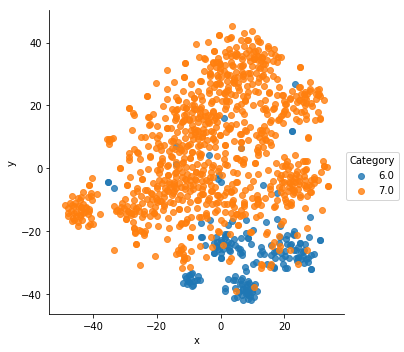

In [24]:
sns.lmplot( x="x", y="y", data=visual, hue="Category",fit_reg=False, legend=True)
plt.show()

In [25]:
visual6=visual[(visual["Category"]==6)]
visual7=visual[(visual["Category"]==7)]

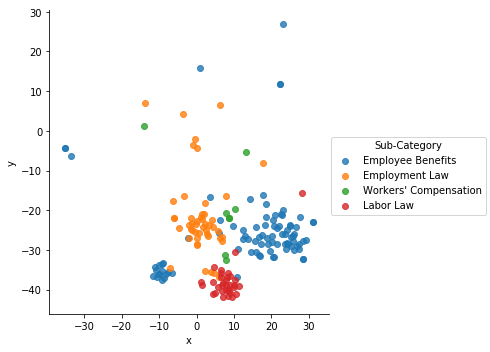

In [26]:

sns.lmplot( x="x", y="y", data=visual6, hue="Sub-Category",fit_reg=False, legend=True)
plt.show()

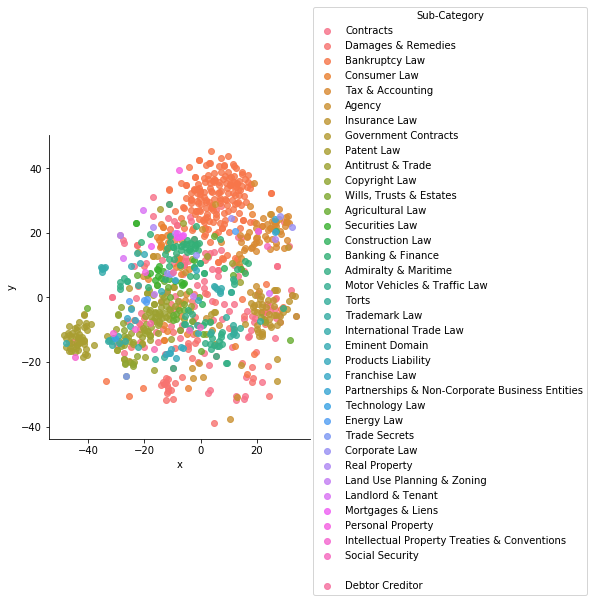

In [27]:
sns.lmplot( x="x", y="y", data=visual7, hue="Sub-Category",fit_reg=False, legend=True)
plt.show()